# Person of Interest (POI) Identifier

### 1. Background：

**About Enron:**
Enron Corporation, an American energy, commodities and services company, was founded in 1985 and used to be one of the world’s major electricity and natural gas companies with claimed revenues of nearly $101 billion during 2000. Fortune nominated Enron as “American Most Innovative Company” for six consecutive years. (“Enron”, 2017) There is no denying that Enron Corp. reached dramatics heights and with its roots in the universal utility services, the company built a solid reputation for old-economy stability. Lead by one of the smartest business man, Jeffery Skilling(CEO), Enron finally became the largest dominant force in the energy and natural gas sectors with an extensive pipeline network in North America. Undoubtedly, by far, Enron’s story was perfect and splendid. However, not all great stories come with happy endings. Enron eventually faced a dizzying collapse and by the fall of 2000, the company was starting to crumble under its own weight. Actually Enron collapsed so fast that it only took several weeks for this seventh largest company in America to claim a bankruptcy at the end of 2001.

**Enron's Bankruptcy Scandal:** Enron was revealed that its published financial condition was inflated by institutionalized accounting fraud and its income as well as equity value were both overstated by a couple of billion dollars. As revealed by the investigator, the company had made a dozen partner companies and used those companies to hide its financial losses and debts on its trading business. (“The fall of enron”, 2017) The impact of this company bankruptcy was extensive and unprecedented. It wiped out the remaining holdings of thousands of investors and throwed 21,000 people out of work. At the same time, Arthur Andersen, one of the “Big Five” accounting firms in the world, was convicted of complicating in perpetrating one of the biggest frauds in corporate history and later surrendered its CPA licenses on 2002. Not only does this swift collapse have a huge impact on business, but it also had implications for politics. Two federal agencies and more than ten congressional committees were investigated and found guilty of criminal charges. What was going wrong on Enron’s business and how could we prevent it in the future? These two major questions soon became increasingly important to the public.

**Target:** In this project, the target is to build a Person of Interest identifier/Label and try to build a Machine Learning Algorithm to predict the possible Persons of Interest based on various features.



### 2. Initial Data Exploration

In [106]:
# Initial imports
import sys
import os
import pickle
import re
from time import time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings
warnings.filterwarnings('ignore')

# To show visualizations in iPython
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [107]:
### Load the dictionary containing the dataset
with open("dataset.pkl", "rb") as f:
    enron_data = pickle.load(f)

The dataset contains 146 entries as indexes, and 21 features as columns. Each entery, is an observation for a specific person/employee in the company. The features contain financial information for each observation, as well as, their emails addresses.

Note: All observations have 1 more feature called POI. POI is the abbreviated version of Person of Interest. This feature is used to mark whether a specific person in the dataset has been part of the Enron Scandal or not.

In [108]:
# print the data
pprint.pprint(enron_data)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                         'from_this_person_to_poi': 'NaN',
                         'loan_advances': 'NaN',
                         'long_term_incentive': 694862,
                         'other': 374689,
                         'poi': False,
                         'restricted_stock': 126027,
                         'restricted_stock_deferred': 'NaN',
                         'salary': 262788,
                         'shared_receipt_with_poi': 'NaN',
                         'to_messages': 'NaN',
                         'total_payments': 2368151,
                         'total_stock_value': 8317782},
 'DODSON KEITH': {'bonus': 70000,
                  'deferral_payments': 'NaN',
                  'deferred_income': 'NaN',
                  'director_fees': 'NaN',
                  'email_address': 'keith.dodson@enron.com',
                  'exercised_stock_options': 'NaN',
                  'expenses': 28164,
                  'from_messages': 14,
                  'from_poi_t

                     'long_term_incentive': 312500,
                     'other': 1553729,
                     'poi': False,
                     'restricted_stock': 3654808,
                     'restricted_stock_deferred': 'NaN',
                     'salary': 85274,
                     'shared_receipt_with_poi': 437,
                     'to_messages': 496,
                     'total_payments': 1979596,
                     'total_stock_value': 5819980},
 'JACKSON CHARLENE R': {'bonus': 250000,
                        'deferral_payments': 'NaN',
                        'deferred_income': 'NaN',
                        'director_fees': 'NaN',
                        'email_address': 'charlene.jackson@enron.com',
                        'exercised_stock_options': 185063,
                        'expenses': 10181,
                        'from_messages': 56,
                        'from_poi_to_this_person': 25,
                        'from_this_person_to_poi': 19,
                

               'poi': False,
               'restricted_stock': 8453763,
               'restricted_stock_deferred': 'NaN',
               'salary': 261879,
               'shared_receipt_with_poi': 'NaN',
               'to_messages': 'NaN',
               'total_payments': 3123383,
               'total_stock_value': 23817930},
 'PEREIRA PAULO V. FERRAZ': {'bonus': 'NaN',
                             'deferral_payments': 'NaN',
                             'deferred_income': -101250,
                             'director_fees': 101250,
                             'email_address': 'NaN',
                             'exercised_stock_options': 'NaN',
                             'expenses': 27942,
                             'from_messages': 'NaN',
                             'from_poi_to_this_person': 'NaN',
                             'from_this_person_to_poi': 'NaN',
                             'loan_advances': 'NaN',
                             'long_term_incentive': 'NaN',


                        'restricted_stock': 384930,
                        'restricted_stock_deferred': 'NaN',
                        'salary': 63744,
                        'shared_receipt_with_poi': 'NaN',
                        'to_messages': 'NaN',
                        'total_payments': 762135,
                        'total_stock_value': 384930},
 'WHALEY DAVID A': {'bonus': 'NaN',
                    'deferral_payments': 'NaN',
                    'deferred_income': 'NaN',
                    'director_fees': 'NaN',
                    'email_address': 'NaN',
                    'exercised_stock_options': 98718,
                    'expenses': 'NaN',
                    'from_messages': 'NaN',
                    'from_poi_to_this_person': 'NaN',
                    'from_this_person_to_poi': 'NaN',
                    'loan_advances': 'NaN',
                    'long_term_incentive': 'NaN',
                    'other': 'NaN',
                    'poi': False,
            

In [109]:
# Data Exploration:

# 1. number of total people in the dataset

human_name = enron_data.keys()
print("Total number of people in the data: " + str(len(human_name)))

# 2. number of features available in the dataset

random_val = enron_data['BOWEN JR RAYMOND M']
print("Total number of features: " + str(len((random_val).keys())))

# 3. list all features

print(random_val.keys())

# 4.number of POIs in the dataset

def count_poi(data):
    count = 0 
    data_keys = data.keys()
    for person in data_keys:
        if data[person]['poi'] == True:
            count += 1
    return count

total_poi_true = count_poi(enron_data)
print("numbers of poi: " + str(total_poi_true))

Total number of people in the data: 146
Total number of features: 21
dict_keys(['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'])
numbers of poi: 18


In [110]:
# use pandas dataframe to reload the dataset
# from_dict can convert an dictionary into a dataframe

enron_df = pd.DataFrame.from_dict(enron_data, orient='index')

enron_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [111]:
# Task: describe statistics 

enron_df.describe().transpose()

,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
loan_advances,146,5,NaN,142
bonus,146,42,NaN,64
email_address,146,112,NaN,35
restricted_stock_deferred,146,19,NaN,128
deferred_income,146,45,NaN,97
total_stock_value,146,125,NaN,20


### 3. Clean `NaN` Values

##### In real world data analysis, it is nearly imposible for you to have perfectly filled in dataset. A records not recored in dataframe is usually expressed as `NaN`.
##### However, we cannot perform changes on `NaN` and may have to convert it to `""` or `0` according to the column type.

In [112]:
# print the number of null entries for each column
print("Amount of NaN values in the dataset: {}".format(enron_df.isnull().sum()))

Amount of NaN values in the dataset: salary                       0
to_messages                  0
deferral_payments            0
total_payments               0
loan_advances                0
bonus                        0
email_address                0
restricted_stock_deferred    0
deferred_income              0
total_stock_value            0
expenses                     0
from_poi_to_this_person      0
exercised_stock_options      0
from_messages                0
other                        0
from_this_person_to_poi      0
poi                          0
long_term_incentive          0
shared_receipt_with_poi      0
restricted_stock             0
director_fees                0
dtype: int64


In [113]:
# clean NaN
enron_df.fillna(0, inplace=True)
enron_df.replace(to_replace='NaN', value=0.0, inplace=True)

In [114]:
# check if your NaN is all gone
# re-run this cell so you can have more information
enron_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,146.0,3.658114e+05,2.203575e+06,0.0,0.00,210596.0,270850.50,26704229.0
to_messages,146.0,1.221589e+03,2.226771e+03,0.0,0.00,289.0,1585.75,15149.0
deferral_payments,146.0,4.387965e+05,2.741325e+06,-102500.0,0.00,0.0,9684.50,32083396.0
total_payments,146.0,4.350622e+06,2.693448e+07,0.0,93944.75,941359.5,1968286.75,309886585.0
loan_advances,146.0,1.149658e+06,9.649342e+06,0.0,0.00,0.0,0.00,83925000.0
bonus,146.0,1.333474e+06,8.094029e+06,0.0,0.00,300000.0,800000.00,97343619.0
restricted_stock_deferred,146.0,2.051637e+04,1.439661e+06,-7576788.0,0.00,0.0,0.00,15456290.0
deferred_income,146.0,-3.827622e+05,2.378250e+06,-27992891.0,-37926.00,0.0,0.00,0.0
total_stock_value,146.0,5.846018e+06,3.624681e+07,-44093.0,228869.50,965955.0,2319991.25,434509511.0
expenses,146.0,7.074827e+04,4.327163e+05,0.0,0.00,20182.0,53740.75,5235198.0


### 4. More Cleaning - duplicates

In [115]:
# find a function that can drop the duplicates in rows
enron_df.drop_duplicates()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,mark.metts@enron.com,0.0,0.0,585062.0,...,38.0,0.0,29.0,1740.0,1.0,False,0.0,702.0,585062.0,0.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0,0.0,-1386055.0,10623258.0,...,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,steven.elliott@enron.com,0.0,-400729.0,6678735.0,...,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,0.0,1788391.0,0.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,bill.cordes@enron.com,0.0,0.0,1038185.0,...,10.0,651850.0,12.0,0.0,0.0,False,0.0,58.0,386335.0,0.0
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,kevin.hannon@enron.com,0.0,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,0.0,0.0,0.0,119292.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,119292.0
CAUSEY RICHARD A,415189.0,1892.0,0.0,1868758.0,0.0,1000000.0,richard.causey@enron.com,0.0,-235000.0,2502063.0,...,58.0,0.0,49.0,307895.0,12.0,True,350000.0,1585.0,2502063.0,0.0
TAYLOR MITCHELL S,265214.0,533.0,227449.0,1092663.0,0.0,600000.0,mitchell.taylor@enron.com,0.0,0.0,3745048.0,...,0.0,3181250.0,29.0,0.0,0.0,False,0.0,300.0,563798.0,0.0
DONAHUE JR JEFFREY M,278601.0,865.0,0.0,875760.0,0.0,800000.0,jeff.donahue@enron.com,0.0,-300000.0,1080988.0,...,188.0,765920.0,22.0,891.0,11.0,False,0.0,772.0,315068.0,0.0


### 5. Outlier Removal

Now we will consider a few features where having outliers can significantly affect our whole analysis. We will analyze these outliers to see whether they should be there or we can remove them to make our analysis more robust.



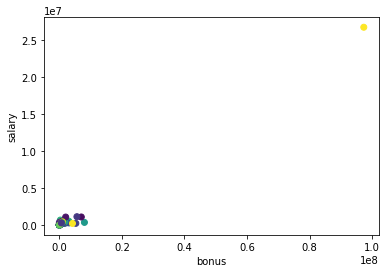

In [116]:
# seperate bonus and salary from data variable

bonus = enron_df['bonus']
salary = enron_df['salary']

# draw scatter plot
colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c=colors)
plt.xlabel("bonus")
plt.ylabel("salary")
plt.show()

##### There is an insane amount there. 
##### There is a key "Total" that represents the total value added for each column. Maybe that's the reason why we have this outlier

In [117]:
# Run me
enron_df.loc['TOTAL']

salary                       2.67042e+07
to_messages                            0
deferral_payments            3.20834e+07
total_payments               3.09887e+08
loan_advances                 8.3925e+07
bonus                        9.73436e+07
email_address                          0
restricted_stock_deferred   -7.57679e+06
deferred_income             -2.79929e+07
total_stock_value             4.3451e+08
expenses                      5.2352e+06
from_poi_to_this_person                0
exercised_stock_options      3.11764e+08
from_messages                          0
other                        4.26676e+07
from_this_person_to_poi                0
poi                                False
long_term_incentive          4.85219e+07
shared_receipt_with_poi                0
restricted_stock             1.30322e+08
director_fees                1.39852e+06
Name: TOTAL, dtype: object

In [118]:
# verify by getting the total and max value of bonus (dont use dataframe)

enron_df['bonus'].max()

def get_total_and_max(dataset):
    if len(dataset) == 0:
        return 0, 0
    max_v = dataset[0]
    second_max_v = dataset[0]
    
    for data in dataset:
        """
        if new value > both max_v and second_max_v:
            max_v = new value
            second_max_v = old max_v
        elif new_value > only second_max_v
            second_max_v = new_value
        else:
            nothing
        """
        if data > max_v and data > second_max_v:
            second_max_v = max_v
            max_v = data
        elif data > second_max_v:
            second_max_v = data
        
    return max_v, second_max_v    

tot_sal, max_sal = get_total_and_max(salary)
tot_bonus, max_bonus = get_total_and_max(bonus)

print("total salary: " + str(tot_sal) + ", max salary: " + str(max_sal))
print("total bonus: " + str(tot_bonus) + ", max bonus: " + str(max_bonus))



total salary: 26704229.0, max salary: 1111258.0
total bonus: 97343619.0, max bonus: 8000000.0


##### Now, the data makes more sense.

##### Okay, so we will redraw the scatter plot by removing the outlier "TOTAL". **During the removal, we should also not include the data that is meaningless to our anlysis**. 

In [119]:
# Remove outliers in enron_data
# quickly drop the key value pair in dictionary through function .pop()
enron_data.pop('TOTAL')
enron_data.pop('THE TRAVEL AGENCY IN THE PARK')

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 362096,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 362096,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [120]:
# remove those two rows from dataframe
enron_df.drop(['TOTAL'], axis = 0, inplace=True)
enron_df.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace=True)

In [121]:
# remove outliers in array bonus and salary in order to draw the scatter plot 
bonus = bonus.tolist()
salary = salary.tolist()

bonus.remove(tot_bonus)
salary.remove(tot_sal)

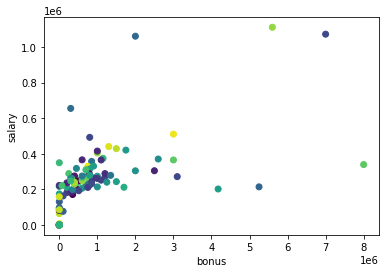

In [122]:
# redraw the scatter plot again

colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c=colors)
plt.xlabel("bonus")
plt.ylabel("salary")
plt.show()

### 6. Decision Tree Classifier

In [123]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [124]:
# Selecting all the features 

features_list = ['to_messages', 'deferral_payments', 
                 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
                 'other', 'from_this_person_to_poi', 'long_term_incentive',
                 'restricted_stock', 'director_fees'
                 ]

# generate labels and featues
labels = enron_df["poi"].tolist()
features = enron_df[features_list].values.tolist()

In [125]:
# Split data into trainings and testings
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5)

In [126]:
# train your decision tree model

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(features_train, labels_train)

In [127]:
# check the accuracy scores
predictions = clf.predict(features_test)
accuracy_score(labels_test, predictions)

0.8333333333333334

In [128]:
# predict the results

predictions

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False])

### 7. Model Validation

Validation is the strategy to evaluate the performance of the model on unseen data. A classic mistake is to evaluate the performance of an algorithm on the same dataset it was trained on. It will make our algorithm perform better than it actually does. However, we will have no idea how our algorithm performs on unseen data.

It is essential practice in data mining procedures to keep a subset of data as holdout data- test data. We train our model on training data and examine the generalization performance of the model on the test data. We hide the label for target variable of the test data from the model and let the model predict the values for target variable. Then we compare the values predicted by the model with the hidden true values. We can also use a more sophisticated holdout training and testing procedure called cross-validation.

There are a number of evaluation metrics for classification challenges. In balanced classes, where all the labels are equally represented, we look at the classification accuracy of the model.

$$
Accuracy=\frac{\textit{Numbers of labels predicted correctly}}{\textit{Total predictions}} = \frac{TP+TN}{Total}
$$

However, accuracy is not ideal for skewed classes. In our case, number of POI are small compared to non-POI (18 vs 128). We can have high accuracy by classifying many non-POI correctly and still not have a POI classiifed correctly. For imbalanced classes like we have, Precision and Recall are common measures of model performance.
$$ Recall = \frac{True\ Positive}{True\ Positive\ +\ False\ Positive} $$




A good precision means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it's very likely to be a real POI and not a false alarm. A low precision indicates a large number of False Positives, where non-POI gets flagged as POI.

A good recall means nearly I am able to identify a POI everytime it shows up in test cases. A low recall indicates many False Negatives, where POIs don't get flagged correctly

F1 score conveys a balance between precision and recall. It is the harmonic mean of precision and recall.
$$ F_{1}\ Score = \frac{2 \cdot precision\cdot recall}{precision+ recall} $$

A good F1-score means both my false positives and false negatives are low, I can identify my POI's reliably and accurately. If my classifier flags a POI then the person is almost certainly a POI, and if the classifier does not flag someone, then they are almost certainly not a POI.

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [130]:
print("Accuracy:", round(accuracy_score(labels_test, predictions), 3))
print("Precision:", round(precision_score(labels_test, predictions), 3))
print("Recall:", round(recall_score(labels_test, predictions), 3))
print("F1-Score:", round(f1_score(labels_test, predictions), 3))

Accuracy: 0.833
Precision: 0.167
Recall: 0.125
F1-Score: 0.143
